![Penguin Banner](https://upload.wikimedia.org/wikipedia/commons/4/47/South_Shetland_Islands-banner.jpg)

 # Investigation of the Palmer Penguins Data Set
Author: Myles Henehan
 ***

 ## Introduction
 This notebook contains my analysis of the famous Palmer Penguins dataset. Through this notebook, I will demonstrate the usefulness of said data set in practicing data analysis techniques through Python. Starting with a short background and description of the data set, I will then move on to discuss the types of variables within the set, and visualise two variables using a bar chart and histogram, respectively. The second part of the notebook will concentrate on the corrolation between two of the variables within the set, drawing the best fit line to conclude the type of correlation. I will then offer some commentary on my discoveries and conclude with some areas for further investigation.
 
 ## Background

The origins of the Palmer Penguins data set can be traced back to the work of Dr. Kristen Gorman and the Palmer Station, a research facility operated by the United States Antarctic Program (USAP). The data contained within this set pertains to the characteristics and species of penguins living on islands around the Palmer Archipegalo in the Antarctic. As an open and freely accessible source, this data set is commonly used by students starting out in the field of data analytics, as it allows them to practice data manipulation using real-life examples. Its manageable size, and mix of variable types allows us to get a glimpse into what we can do with data, using libraries like Pandas, NumPy, and Matplotlib.

## Structure and Variables in the Palmer Penguins Data Set

The Palmer Penguins data set consists of 334 rows, each representing an individual penguin observed in the region. There are also 7 columns, or 'data series' as they are called in data analytics terms, each representing a different characteristic or variable pertaining to the individual. The variables comprise the species of the individual, the island on which it was found, the sex of the penguin, and a number of physical measurements, including bill length, bill depth, flipper length, and body mass.

## Identifying the variable types useful for analysis

Looking at the variables outlined above, it is clear that there are two main variable types for consideration in this data set: categorical and numerical.

Categorical variables represent qualitative attributes: in other words, information that describes qualities or characteristics, rather than quantities or numerical values. In the case of this data set, Species, Island and Sex would be considered the 3 categorical values. Unlike numerical variables, which can reach an infinite number, categorical variables are typically finite. For example, while I can't say for sure that there aren't any examples of intersex penguins in the Antarctic, the vast majority of penguins surveyed will fit into the category of either Male or Female. Similarly, there is only a certain number of islands that have been surveyed and a certain number of species that scientists in the region are aware of.

Numerical variables, on the other hand, represent quantitative attributes, that can be counted, compared, and subjected to mathematical operations. In this data set, we have 4 such variables: bill length, bill depth, flipper length and body mass. Unlike with categorical variables, there is really an infinite number of values that we can have. For example, no two penguins are likely to have the exact same flipper length. Perhaps, by rounding up to an integer you could, but looking at them as floats, there is always going to be some margin of variation, even if that is only 10^{-5} of a milimetre.

## Libraries

Before beginning any sort of exploration of the data, we first need to import the essential libraries.

Firstly, we will import Pandas, an open-source Python library used for data manipulation and analysis. Since this Python library is geared towards tabular data, it is a perfect tool to explore the dataset and visualise it in a logical way. 

We will also need to import Matplotlib to produce suitable plots of these variables. The benefit of this plotting library is that it is highly customisable, allowing us to have greater control over our plots.

Finally, we will need to import NumPy to help us get the best fit line.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Looking at the data



Let's make a start by reading in the Palmer Penguins data set from csv format, available as a public source on GitHub.

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
#Here, df stands for "Data Frame". The function pd.read_csv allows us to read a csv file and call it df.

Now let's get a quick preview of how the data set looks in order to know what we are working with and choose some variables that look interesting.

In [11]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Plotting a variable on a Bar Chart

Since bar charts are mainly suited to categorical data, let's take try to visualise the counts of each penguin species.

In [27]:
# First, we count the number of penguins of each species using the function below. 
PenguinSpecies = df['species'].value_counts()
# Now let's print it so We have an idea of what we're going to see in the plot.
PenguinSpecies

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

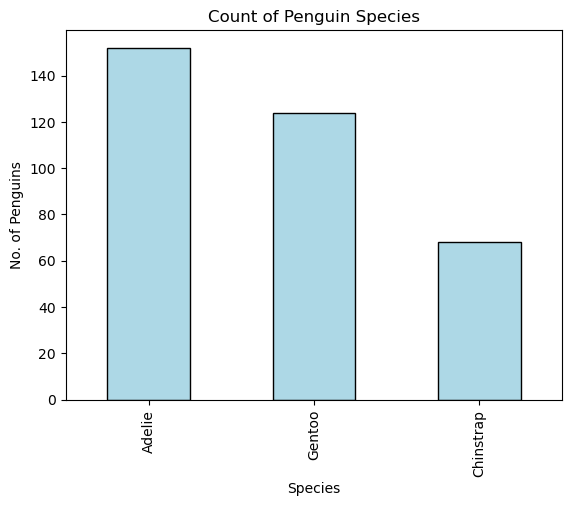

In [33]:
PenguinSpecies.plot(kind='bar', color='lightblue', edgecolor='black') # this function plots a bar chart of the counts of penguin species, using species for the x axis and the count for the y axis.
plt.xlabel('Species')
plt.ylabel('No. of Penguins')
plt.title('Count of Penguin Species')
#Added labels and a title
plt.show()

As we can see from the bar chart, the Adelie species of penguin is seemingly the most common around these islands, with around 152 individual penguins observed. Meanwhile, the Chinstrap is the rarest, with only 68 identified.

## Plotting a variable on a Histogram

While a bar chart is a useful way of representing categorical data, it does have its limitations when it comes to numerical data. Let's take Body Mass as an example - since there are 344 rows, we are going to see quite a lot of individual values.

Let's first see how many unique values we have for body mass:

In [35]:
BodyMass = df['body_mass_g'].value_counts()
BodyMass

body_mass_g
3800.0    12
3700.0    11
3900.0    10
3950.0    10
3550.0     9
          ..
4475.0     1
3975.0     1
3575.0     1
3850.0     1
5750.0     1
Name: count, Length: 94, dtype: int64

There are 94 different unique values here, so if we were to try to represent this in a bar chart, we would end up with something like this:

<Axes: xlabel='body_mass_g'>

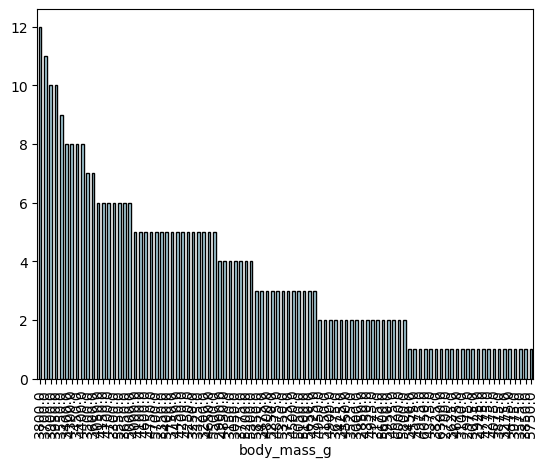

In [36]:
BodyMass.plot(kind='bar', color='lightblue', edgecolor='black')

As you can see, there are so many individual values here, with the most common appearing only 12 times, and many only appearing once, so it offers no real useful representation.

Instead, we need to use a histogram. The advantage of this plot type is that when it comes to floats, a histogram will add the values into ranges known as bins, to break the data into more meaningful chunks.

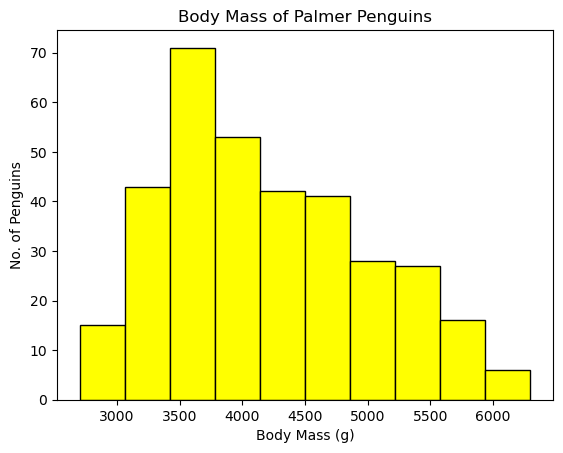

In [40]:
plt.hist(df['body_mass_g'], bins=10, color='yellow', edgecolor='black')
plt.xlabel('Body Mass (g)')
plt.ylabel('No. of Penguins')
plt.title('Body Mass of Palmer Penguins')
plt.show()


# Analysis of the Correlation between Two Variables
## Creating a Scatter Plot

A variable by itself does not offer us a lot of information. It's only when we look at the correlation between 2 variables that we start to see interesting patterns.

The easiest way to plot two different variables and check their correlation is as a scatter splot. Here, I am interested in the correlation between bill length and bill depth. My assumption is that the longer the bill, the deeper it will be. This would conform with the standard in nature, where things tend to grow exponentially.

Let's have a look at these variables first:

In [18]:
# We're going to start by defining the data series in the data frame, bill_depth_mm, as billdepth
billdepth = df['bill_depth_mm']

# Let's convert this to a numpy array to make it easier to work with:

billdepth = billdepth.to_numpy()

# Now, let's do the same 2 steps with the bill length:
billlen = df['bill_length_mm']
billlen = billlen.to_numpy()

# Remove NaN values from the data
valid_indices = ~np.isnan(billdepth) & ~np.isnan(billlen)
billdepth = billdepth[valid_indices]
billlen = billlen[valid_indices]


# Note: when trying to get the best fit line, I was getting the error that parameter number 4 had an illegal value.
# By using boolean indexing method, I managed to remove these values from the arrays.
# This is something I don't know much about, but it solved the issue (Source: ChatGPT)


Now, let's create a scatter plot using these arrays.

Text(0.5, 1.0, 'Correlation between Bill Depth and Bill Length')

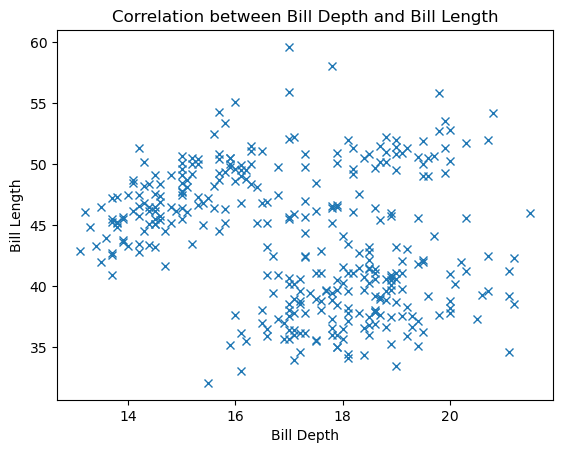

In [42]:
# Create a new figure and set of axes (stateless approach).
#fig is the overall figure, and ax is the set of axes on this figure (just one in this case).
fig, ax = plt.subplots()

#Here's the function to create a plot:
ax.plot(billdepth, billlen, 'x')

# Now let's add some labels:
ax.set_xlabel('Bill Depth')
ax.set_ylabel('Bill Length')
ax.set_title('Correlation between Bill Depth and Bill Length')

# We could also use the ax.set_xlim() and ax.set_ylim() functions here if we wanted to change the limits of the axes, but in this case, I don't think it's necessary.
#I would use fig.show(), but jupyter notebooks do this automatically

Looking at this scatter plot, there doesn't seem to be any sort of noticeable correlation, either negative or positive. On the contrary, it appears that we have clusters of data. The first thing that springs to mind is whether this is because our data contains multiple penguin species, for which the individual bill correlation per species may differ (but more on that later).

## Adding a Best Fit Line
***

In order to work out the correlation between these 2 variables, the best way is to use the Pearson Coefficient.

See below:

In [20]:
# uses the y = mx + c method

m, c = np.polyfit(billdepth, billlen, 1)

m, c

#note, when testing this, I was getting the error that parameter number 4 had an illegal value. 


(-0.6498355630183155, 55.06736977191969)

In the Pearson coefficient...

Now we map it onto our plot as a 'best fit" line and we can clearly see the downwards slope of the line, signifying a negative correlation.

Text(0, 0.5, 'Bill Length')

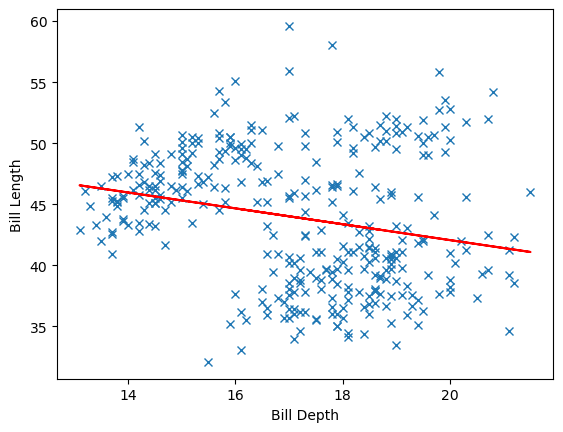

In [44]:
# Let's plot a red line onto the plot

fig, ax = plt.subplots()

ax.plot(billdepth, billlen, 'x')

#This time we're adding another plot command to insert our best fit line:
# "r-" represents the red line. 
ax.plot(billdepth, m * billdepth + c, 'r-')

ax.set_xlabel('Bill Depth')
ax.set_ylabel('Bill Length')

## Additional Exploration

Going back to my theory above, I would like to see if this negative correlation is due to the fact that I've included all species of penguin in my analysis.

So let's take a look on an individual species level.

Source to insert: https://www.researchgate.net/publication/362573623_Palmer_Archipelago_Penguins_Data_in_the_palmerpenguins_R_Package_-_An_Alternative_to_Anderson%27s_Irises?_tp=eyJjb250ZXh0Ijp7ImZpcnN0UGFnZSI6Il9kaXJlY3QiLCJwYWdlIjoiX2RpcmVjdCJ9fQ#pf6

In [ ]:
#First, we need to separate the data by 

fig, ax = plt.subplots()

ax.plot(billdepth, billlen, 'x')

#This time we're adding another plot command to insert our best fit line:
# "r-" represents the red line. 
ax.plot(billdepth, m * billdepth + c, 'r-')

ax.set_xlabel('Bill Depth')
ax.set_ylabel('Bill Length')

## References

Data originally published in:

Gorman KB, Williams TD, Fraser WR (2014). Ecological sexual dimorphism and environmental variability within a community of Antarctic penguins (genus Pygoscelis). PLoS ONE 9(3):e90081. https://doi.org/10.1371/journal.pone.0090081

# End